In [140]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd

In [141]:
class LSA:
    
    def __init__(self):
        print('Object Created')
    
    def read_data(self, path):
        data = pd.read_csv(path)
        return data
        
    
    def prepare_documents(self, document_list):
    
        """
        Input  : document list
        Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
        Output : term dictionary and Document Term Matrix

        """
    
        # A term dictionary is a collection of all unique words in the corpus, such that each unique word is assigned an
        # index value.
        term_dict = corpora.Dictionary(document_list)
        
        # A document term matrix is an num_of_doc * vocab matrix
        document_term_matrix = [term_dict.doc2bow(doc) for doc in document_list]
        
        
        return term_dict, document_term_matrix
    
    
    def generate_gensim_LSA(self, document_list, num_of_topics, words):
    
        """
        Input  : clean document, number of topics and number of words associated with each topic
        Purpose: create LSA model using gensim
        Output : return LSA model

        """
        term_dict , document_term_matrix = self.prepare_documents(document_list)
        
        LSA_model = LsiModel( document_term_matrix, num_topics = num_of_topics, id2word = term_dict )
        print(LSA_model.print_topics(num_topics=num_of_topics, num_words=words))
        
        return LSA_model
    
    
    def compute_coherence_values(self, document_list, term_dictionary, document_term_matrix, stop , start = 2,  step = 3):

        """
        Input   : dictionary : Gensim dictionary
                  corpus : Gensim corpus
                  texts : List of input texts
                  stop : Max num of topics
        Purpose : Compute c_v coherence for various number of topics
        Output  : model_list : List of LSA topic models
                  coherence_values : Coherence values corresponding to the LDA model with respective number of topics
        """

        coherence_values = []
        model_list = []

        for count in range(start, stop, step):
            
            print('Generating model for topic number',count)
            model = LsiModel(document_term_matrix, num_topics = count, id2word = term_dictionary)
            model_list.append(model)

            coherence_model = CoherenceModel(model = model, texts = document_list, dictionary = term_dictionary,
                                             coherence = 'c_v')
            
            coherence_values.append(coherence_model.get_coherence())

        return model_list, coherence_values
    
    
    def plot_coherence_values(self, document_list, stop, start, step):
        

        term_dictionary, document_term_matrix = self.prepare_documents(document_list)
        model_list, coherence_values = self.compute_coherence_values(document_list, term_dictionary, document_term_matrix, 
                                                                 stop, start, step)
        
        # Show graph:
        print(model_list, coherence_values)
        x = range(start, stop, step)
        plt.plot(x, coherence_values)
        plt.xlabel("Number of Topics")
        plt.ylabel("Coherence score")
        plt.legend(("coherence_values"), loc = 'best')
        plt.show() 

<b>Trial Run :</b>

In [144]:
data = pd.read_csv('C:/Users/Amey/Desktop/Neural Networks/Machine Learning/NLP/Projects/Technodifacation/Data/training_data_marathi.csv')
document_list = data['text'].to_list()
print(document_list[1])

तर , विशिष्ट गोष्टींद्वारे , ठराविक कायद्यांद्वारे विशिष्ट तत्त्वांनी मार्गदर्शित नसल्यास त्या गोष्टी परिभाषित केल्या नसल्यास नियंत्रण करणे खूप कठीण आहे म्हणून , त्यात संपूर्ण खाद्यपदार्थ नियंत्रित करण्यासाठी मूळ स्वरुपाचा किंवा प्रत्यक्ष किंवा अप्रत्यक्षपणे हाताळल्यानंतर कोणत्याही स्वरुपाच्या प्रक्रियेनंतर किंवा कोणत्याही स्वरुपाचे नियंत्रण करणे .


In [146]:
from Preprocess_Text import Preprocess
pp = Preprocess([])
document_list = [pp.clean_text(doc) for doc in document_list]
print(document_list[1])

तर विशिष्ट गोष्टींद्वारे ठराविक कायद्यांद्वारे विशिष्ट तत्त्वांनी मार्गदर्शित नसल्यास त्या गोष्टी परिभाषित केल्या नसल्यास नियंत्रण करणे खूप कठीण आहे म्हणून त्यात संपूर्ण खाद्यपदार्थ नियंत्रित करण्यासाठी मूळ स्वरुपाचा किंवा प्रत्यक्ष किंवा अप्रत्यक्षपणे हाताळल्यानंतर कोणत्याही स्वरुपाच्या प्रक्रियेनंतर किंवा कोणत्याही स्वरुपाचे नियंत्रण करणे 


In [147]:
print(len(document_list))

41997


In [64]:
document_list = [doc.split() for doc in document_list]

In [138]:
#Defining control variables

start, stop, step = 2, 100, 1
num_of_dims = 300
top_words = 5
lsa = LSA()

Object Created


Generating model for topic number 2
Generating model for topic number 3
Generating model for topic number 4
Generating model for topic number 5
Generating model for topic number 6
Generating model for topic number 7
Generating model for topic number 8
Generating model for topic number 9
Generating model for topic number 10
Generating model for topic number 11
Generating model for topic number 12
Generating model for topic number 13
Generating model for topic number 14
Generating model for topic number 15
Generating model for topic number 16
Generating model for topic number 17
Generating model for topic number 18
Generating model for topic number 19
Generating model for topic number 20
Generating model for topic number 21
Generating model for topic number 22
Generating model for topic number 23
Generating model for topic number 24
Generating model for topic number 25
Generating model for topic number 26
Generating model for topic number 27
Generating model for topic number 28
Generatin

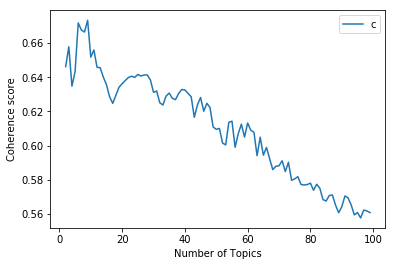

In [139]:
# Generating graph of coherence values for different topic numbers (dimensions)
lsa.plot_coherence_values(document_list, stop, start, step)

In [126]:
model = lsa.generate_gensim_LSA(document_list[:41997],25,top_words)

[(0, '0.534*"\'आहे\'" + 0.424*"\'आणि\'" + 0.340*"\'आपण\'" + 0.230*"\'\'" + 0.215*"\'की\'"'), (1, '-0.952*"\'\'" + 0.178*"\'आपण\'" + 0.128*"\'आहे\'" + 0.079*"\'की\'" + 0.069*"\'आणि\'"'), (2, '0.693*"\'आपण\'" + -0.629*"\'आहे\'" + 0.157*"\'आणि\'" + 0.093*"\'शकता\'" + -0.092*"\'हे\'"'), (3, '0.788*"\'आणि\'" + -0.432*"\'आपण\'" + -0.263*"\'आहे\'" + -0.165*"\'की\'" + 0.163*"\'ते\'"'), (4, '0.794*"\'ते\'" + -0.318*"\'आणि\'" + 0.244*"\'किंवा\'" + -0.181*"\'आपण\'" + -0.169*"\'आहे\'"'), (5, '-0.472*"\'हे\'" + -0.402*"\'की\'" + 0.345*"\'आहे\'" + 0.343*"\'ते\'" + -0.295*"\'आहे\']"'), (6, '0.574*"\'की\'" + -0.385*"\'एक\'" + -0.366*"[\'तर\'" + -0.360*"\'आहे\']" + -0.253*"\'हे\'"'), (7, '0.665*"\'हे\'" + -0.444*"\'किंवा\'" + -0.429*"\'एक\'" + 0.194*"\'ते\'" + -0.185*"\'काही\'"'), (8, '0.775*"\'तर\'" + 0.290*"\'जर\'" + 0.281*"\'असेल\'" + -0.194*"\'ते\'" + -0.169*"\'आपण\'"'), (9, '-0.618*"\'किंवा\'" + 0.376*"\'की\'" + 0.322*"\'आहे\']" + -0.305*"\'हे\'" + 0.253*"[\'तर\'"'), (10, '-0.485*"\'एक\'" + 0.478*

In [127]:
model.get_topics().shape

(25, 57088)

In [128]:
# Saving the LSA model
term_dict, doc_matrix = lsa.prepare_documents(document_list[:41997])

In [129]:
print(len(term_dict))
print((doc_matrix)[0])

57088
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]


In [130]:
# LSA embeddings vector : vocab x num_dim
LSA_embeddigs = model.projection.u
LSA_embeddigs.shape

(57088, 25)

In [131]:
# Sample Embedding from LSA
print(LSA_embeddigs[0])
print(type(LSA_embeddigs))
print(term_dict[0].replace("'",''))

[3.405050e-04 1.364770e-04 1.128389e-04 1.395007e-04 5.864709e-04 4.455682e-05 2.996373e-04 4.165413e-05 2.034043e-04
 6.757257e-04 3.396510e-04 1.577193e-04 5.640882e-05 1.896670e-04 4.141805e-04 1.506609e-04 3.620373e-04 2.484425e-04
 3.108881e-04 1.261440e-05 1.558602e-04 8.905022e-05 3.483218e-04 9.536078e-04 7.144998e-04]
<class 'numpy.ndarray'>
अडकले


<b> Working with obtained LSA embeddings </b>

In [136]:
import numpy as np

embeddings_dict = {}
counter = 0

for embedding in LSA_embeddigs:
    embeddings_dict[term_dict[counter].replace("'",'')] = embedding
    counter += 1

In [133]:
embeddings_dict['अडकले']

array([3.405050e-04, 1.364770e-04, 1.128389e-04, 1.395007e-04, 5.864709e-04, 4.455682e-05, 2.996373e-04, 4.165413e-05,
       2.034043e-04, 6.757257e-04, 3.396510e-04, 1.577193e-04, 5.640882e-05, 1.896670e-04, 4.141805e-04, 1.506609e-04,
       3.620373e-04, 2.484425e-04, 3.108881e-04, 1.261440e-05, 1.558602e-04, 8.905022e-05, 3.483218e-04, 9.536078e-04,
       7.144998e-04])

In [134]:
import pickle

with open('../Topic Modelling/DS_marathi_LSA_25.pkl','wb') as file:
    pickle.dump(embeddings_dict, file, pickle.HIGHEST_PROTOCOL)

In [135]:
with open('../Topic Modelling/DS_marathi_LSA_25.pkl','rb') as file:
    temp = pickle.load(file)
    
temp['अडकले']

array([3.405050e-04, 1.364770e-04, 1.128389e-04, 1.395007e-04, 5.864709e-04, 4.455682e-05, 2.996373e-04, 4.165413e-05,
       2.034043e-04, 6.757257e-04, 3.396510e-04, 1.577193e-04, 5.640882e-05, 1.896670e-04, 4.141805e-04, 1.506609e-04,
       3.620373e-04, 2.484425e-04, 3.108881e-04, 1.261440e-05, 1.558602e-04, 8.905022e-05, 3.483218e-04, 9.536078e-04,
       7.144998e-04])